# Focus on electric cars
Please run sina_all.ipynb first!

## 1.Generate Powershell script 
Run python code below

In [1]:
# Global Constants
import os
data_directory='./data_all'

data_directory_e='./data_e'
data_directory_eInfo_1='./data_eInfo_1'
csv_path='df_sales_all.csv'
csv_e_path='df_sales_e.csv'

if not os.path.exists(data_directory_e):
    os.makedirs(data_directory_e)
    

if not os.path.exists(data_directory_eInfo_1):
    os.makedirs(data_directory_eInfo_1)

In [2]:
# Constants
carGuidePrice="" # example "10-15" 
corpType=""
energyType="3,2,1-6"
base="https://price.auto.sina.com.cn/api/PaihangbangSales/getSubSalesByParams?size=30"

def generateCommand(year="2023",month="01",page="1"):
    url=f'\"{base}&page={page}&year={year}&month={month}&carGuidePrice={carGuidePrice}&serialJiBie=&corpType={corpType}&ranliaoXingshi={energyType}&serial_id=&need_detail=1\"'

    fileName=f'{year}-{month}_{page}.json'
    command=f'curl {url} -o {fileName}'
    return command

In [3]:
## 1.1 crawl all data
          

In [4]:
## 1.2 crawl data in specific month
year='2023'
month='04'
with open(f'{data_directory_e}/getJSON-{year}-{month}.ps1',"w") as f:
    for i in range(30):
        print(generateCommand(year,month,page=i),file=f)

## 2.Crawl Data
run *./data_e/getJSON-{year}-{month}.ps1*

Right click and *Run With PowerShell*.

only need to Run latest  *./data_e/getJSON-{year}-{month}.ps1*
### Notice
Attention to crawling too fast!


## 3.Extract Data
### 3.1 get serial info and url

In [27]:
import json
import pandas as pd

def extractData(filepath,df):
    with open(filepath,'r',encoding="utf8") as file:
        file_data=json.load(file)
        date = filepath.split('/')[-1].split('.')[0].split('_')[0]

        for i in range(len(file_data['data']['list'])):
            sub_brand_id=file_data['data']['list'][i]['sub_brand_id']

            sales_volume=file_data['data']['list'][i]['sales_volume']
            
            if  not sub_brand_id in df.index.values:
                serialZhName=file_data['data']['list'][i]['serial_info']['serialZhName']
        #         sales_volume_list=file_data['data']['list'][i]['qx_details']
                df.loc[sub_brand_id, 'serialZhName']=serialZhName
                df.loc[sub_brand_id, 'url']=f'https://db.auto.sina.com.cn/{sub_brand_id}'
#                 df[date] = pd.Series(name='sub_brand_id', dtype=object, index=df.index)
            df.loc[sub_brand_id, date] = sales_volume
                

In [41]:

df_sales_e = pd.DataFrame(index=pd.Index([], name='sub_brand_id'))
# df_info= pd.DataFrame(index=pd.Index([], name='sub_brand_id'), columns=['info'])
for filename in os.listdir(data_directory_e):
    if filename.endswith('.json'):
        filepath = f'{data_directory_e}/{filename}'
        extractData(filepath,df_sales_e)
df_sales_e=df_sales_e.fillna(0)

In [43]:
df_sales_e.to_csv(csv_e_path)

In [88]:
df_sales_e=pd.read_csv(csv_e_path)
df_sales_e.set_index('sub_brand_id', inplace = True)
df_sales_e

,serialZhName,url,2023-05
sub_brand_id,,,
4281,Model Y,https://db.auto.sina.com.cn/4281,31980
4411,海豚,https://db.auto.sina.com.cn/4411,29593
4261,秦PLUS DM-i,https://db.auto.sina.com.cn/4261,28093
4507,元PLUS,https://db.auto.sina.com.cn/4507,23937
4213,宋PLUS DM-i,https://db.auto.sina.com.cn/4213,21480
...,...,...,...
3906,蔚来EC6,https://db.auto.sina.com.cn/3906,28
2971,沃尔沃S60混动,https://db.auto.sina.com.cn/2971,27
4186,荣威ei6 MAX,https://db.auto.sina.com.cn/4186,26


In [48]:
df_sales_all=pd.read_csv(csv_path)
df_sales_all.set_index('sub_brand_id', inplace = True)
df_sales_all

,serialZhName,url,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,...,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05
sub_brand_id,,,,,,,,,,,,,,,,,,,,,
428,轩逸,https://db.auto.sina.com.cn/428,50275,4463,24109,32063,43922,47654,47123,47281,...,40309,35268,32968,25353,51671,27738,20559,21989,24767,31075
549,朗逸,https://db.auto.sina.com.cn/549,45836,3547,21713,26712,31294,29592,32845,40498,...,30247,33818,29013,22451,47322,24057,26746,24945,26250,24989
776,哈弗H6,https://db.auto.sina.com.cn/776,37674,3573,15036,17087,19109,20315,23742,24518,...,18293,16402,19620,14635,34524,18785,13051,13661,15136,16246
492,卡罗拉,https://db.auto.sina.com.cn/492,31392,4206,19396,28406,32964,33546,31485,30342,...,26707,23058,21294,19592,30950,10675,11899,15843,16158,15480
573,宝来,https://db.auto.sina.com.cn/573,30557,2667,17975,21357,23533,23023,25102,29643,...,17523,17826,16847,14474,26533,14676,12296,13611,13659,15264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,家宝,https://db.auto.sina.com.cn/5351,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38,44
5115,奔腾M9,https://db.auto.sina.com.cn/5115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29,65
4595,海鸥,https://db.auto.sina.com.cn/4595,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,8465


### 3.2 crawl more infomation

In [9]:

base="https://db.auto.sina.cn/inter/serial/someinfo/"

def generateCommand_eInfo_1(sub_brand_id=4281):
    url=f'\"{base}/{sub_brand_id}/\"'

    fileName=f'info_{sub_brand_id}.json'
    command=f'curl {url} -o {fileName}'
    return command

In [49]:
with open(f'{data_directory_eInfo_1}/getJSON-eInfo_1.ps1',"w") as f:
    for sub_brand_id in df_sales_e.index:
        print(generateCommand_eInfo_1(sub_brand_id),file=f)

run *./data_eInfo/getJSON-eInfo.ps1*

Right click and *Run With PowerShell*.

In [85]:
def extractData_eInfo(filepath,df):
    with open(filepath,'r',encoding="utf8") as file:
        file_data=json.load(file)
        sub_brand_id=file_data['data']["serialId"]
        
        df.loc[sub_brand_id, "rechargeMileage/km"] = file_data['data']["xuhanglichengMax"]
        df.loc[sub_brand_id, "minimiumChargeTime/h"] = file_data['data']["kuaichongshijianMin"]


In [91]:
for filename in os.listdir(data_directory_eInfo_1):
    if filename.endswith('.json'):
        filepath = f'{data_directory_eInfo_1}/{filename}'
        extractData_eInfo(filepath,df_sales_e)
df_sales_e

,serialZhName,url,2023-05,rechargeMileage/km,minimiumChargeTime/h
sub_brand_id,,,,,
4281,Model Y,https://db.auto.sina.com.cn/4281,31980,660,1.0
4411,海豚,https://db.auto.sina.com.cn/4411,29593,420,0.5
4261,秦PLUS DM-i,https://db.auto.sina.com.cn/4261,28093,120,
4507,元PLUS,https://db.auto.sina.com.cn/4507,23937,510,0.5
4213,宋PLUS DM-i,https://db.auto.sina.com.cn/4213,21480,150,
...,...,...,...,...,...
3906,蔚来EC6,https://db.auto.sina.com.cn/3906,28,,
2971,沃尔沃S60混动,https://db.auto.sina.com.cn/2971,27,84,
4186,荣威ei6 MAX,https://db.auto.sina.com.cn/4186,26,70,


# continue
https://db.auto.sina.com.cn/428/peizhi/
https://db.auto.sina.com.cn/428/

## 5.Plot


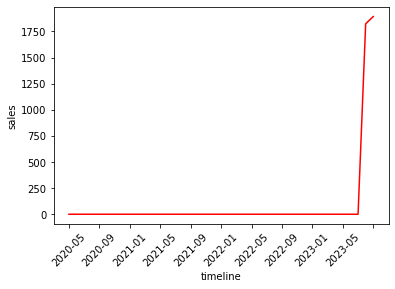

In [50]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.xlabel('timeline')
plt.ylabel('sales')

skipped_col_indices=['sub_brand_id','serialZhName','url']
x=[x for x in df_sales_all.columns if x not in skipped_col_indices]

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
ax.xaxis.set_major_formatter(ticker.FixedFormatter(x[0::4])) 
plt.xticks(rotation=45)

row_index=922

y = df_sales_all.iloc[row_index, ~df_sales_all.columns.isin(skipped_col_indices)].values
# plt.title(df_sales_all.loc(row_index,'serialZhName'))
plt.plot(x,y,color='r')
plt.show()

